In [1]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos
housing = fetch_california_housing() # Call the function to get the housing data
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print(X_train.shape, X_valid.shape, X_test.shape)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

(11610, 8) (3870, 8) (5160, 8)


In [3]:
# Crear el modelo dered neuronal
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])

# Compilar el modelo
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=[keras.metrics.RootMeanSquaredError(),
                       keras.metrics.MeanAbsolutePercentageError()]) # Include MAPE metric
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 3s 6ms/step - loss: 1.7195 - root_mean_squared_error: 1.3113 - mean_absolute_percentage_error: 45.9529 - val_loss: 0.7647 - val_root_mean_squared_error: 0.8745 - val_mean_absolute_percentage_error: 34.8761
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7224 - root_mean_squared_error: 0.8499 - mean_absolute_percentage_error: 35.5397 - val_loss: 0.6754 - val_root_mean_squared_error: 0.8219 - val_mean_absolute_percentage_error: 35.4493
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6637 - root_mean_squared_error: 0.8147 - mean_absolute_percentage_error: 34.7810 - val_loss: 0.6364 - val_root_mean_squared_error: 0.7978 - val_mean_absolute_percentage_error: 34.5534
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6295 - root_mean_squared_error: 0.7934 - mean_absolute_percentage_error: 33.7097 - val_loss: 0.6057 - val_root_mean_squared_error: 0.7783 - val_

<Axes: >

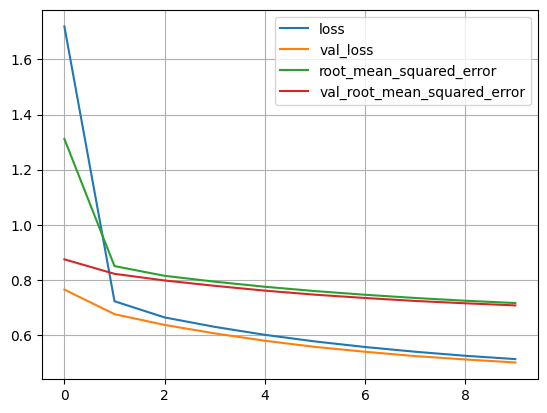

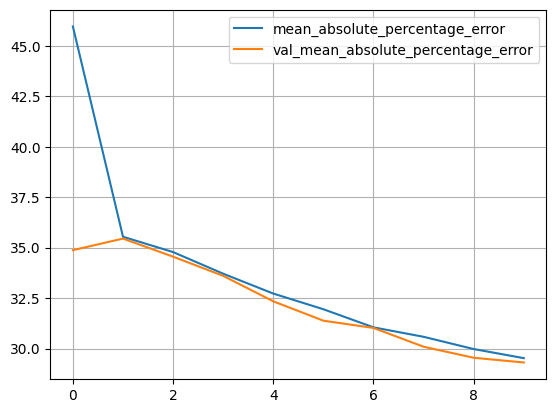

In [4]:
# Graficar el historial de entrenamiento
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)


In [5]:
# Evaluar el modelo
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train", loss)
print("root_mean_squared_error train", RMSE)
print("mean_absolute_percentage_error train", MAPE)


363/363 [==============================] - 1s 1ms/step - loss: 0.5060 - root_mean_squared_error: 0.7114 - mean_absolute_percentage_error: 29.2628
Evaluar el modelo en el conjunto de entrenamiento
loss train 0.5060208439826965
root_mean_squared_error train 0.7113513946533203
mean_absolute_percentage_error train 29.26279067993164


In [6]:
# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid", loss)
print("root_mean_squared_error valid", RMSE)
print("mean_absolute_percentage_error valid", MAPE)

121/121 [==============================] - 1s 5ms/step - loss: 0.5001 - root_mean_squared_error: 0.7072 - mean_absolute_percentage_error: 29.3138
Evaluar el modelo en el conjunto de validación
loss valid 0.5001463890075684
root_mean_squared_error valid 0.7072103023529053
mean_absolute_percentage_error valid 29.31377601623535


In [7]:
# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test", loss)
print("root_mean_squared_error test", RMSE)
print("mean_absolute_percentage_error test", MAPE)

162/162 [==============================] - 0s 1ms/step - loss: 0.5013 - root_mean_squared_error: 0.7081 - mean_absolute_percentage_error: 29.1559
Evaluar el modelo en el conjunto de prueba
loss test 0.5013456344604492
root_mean_squared_error test 0.7080576419830322
mean_absolute_percentage_error test 29.155925750732422
